In [2]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('paper')
import pandas as pd

## How do co-ordinates transform?

The transformation from cartesian-to-polar co-ordinates is simple but interesting.

$$r = \sqrt{x^2 + y^2}, \theta = \arctan{\frac{y}{x}}$$

which, more familiarly gives:

$$x = r\,cos(\theta), y = r\,sin(\theta)$$

Both of these are non-linear transforms as can be seen below.

We first show the $(x,y) \rightarrow (r, \theta)$ transform:

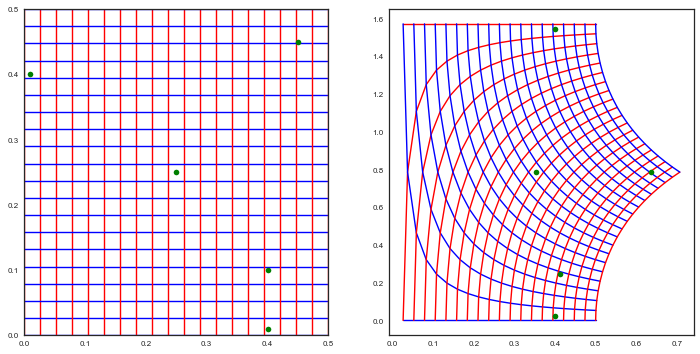

In [39]:
rf = lambda x,y: np.sqrt(x*x + y*y)
thetaf = lambda x,y: np.arctan(y/x)
plt.figure(figsize=[12,6])
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.set_xlim([0, 1/2])
ax1.set_ylim([0, 1/2])
gsize=20
for pt in np.linspace(0, 1/2, gsize):
    x = np.array([pt]*gsize)
    y = np.linspace(0, 1/2, gsize)
    ax1.plot(x, y, color="r")
    r = rf(x,y)
    theta = thetaf(x,y)
    ax2.plot(r, theta, color="r")
    x = np.linspace(0, 1/2, gsize)
    y = np.array([pt]*gsize)
    ax1.plot(x, y, color="b")
    r = rf(x,y)
    theta = thetaf(x,y)
    ax2.plot(r, theta, color="b")
testx = np.array([0.4, 0.4, 0.25, 0.01, 0.45])
testy = np.array([0.01, 0.1, 0.25, 0.4, 0.45])
ax1.plot(testx, testy, 'o', color='g')
ax2.plot(rf(testx, testy), thetaf(testx, testy), 'o', color='g')

And you can see stuff in the upper right quadrant transform more linearly...because its smaller

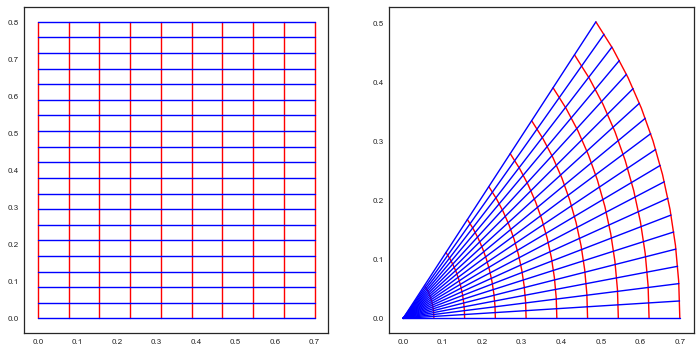

In [47]:
rf = lambda x,y: np.sqrt(x*x + y*y)
thetaf = lambda x,y: np.arctan(y/x)
xf = lambda r, theta: r*np.cos(theta)
yf = lambda r, theta: r*np.sin(theta)
plt.figure(figsize=[12,6])
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
#ax2.set_xlim([0, 0.5])
#ax2.set_ylim([0, 0.5])
gsize=10
for pt in np.linspace(0, 0.7, gsize):
    r = np.array([pt]*gsize)
    theta = np.linspace(0, 0.8, gsize)
    ax1.plot(r, theta, color="r")
    x = xf(r,theta)
    y = yf(r, theta)
    ax2.plot(x, y, color="r")
for pt in np.linspace(0, 0.8, gsize*2):    
    r = np.linspace(0, 0.7, gsize*2)
    theta = np.array([pt]*gsize*2)
    ax1.plot(r, theta, color="b")
    x = xf(r,theta)
    y = yf(r, theta)
    ax2.plot(x, y, color="b")

Even with generally non-linear transforms, local stuff transforms linearly. You can see this from the chain rule.

$$dx = \frac{\partial x}{\partial r} dr + \frac{\partial x}{\partial \theta} d\theta$$

$$dy = \frac{\partial y}{\partial r} dr + \frac{\partial y}{\partial \theta} d\theta$$

Then the infinitessimal areas transform via the determinant of the partials of this transform, or the determinantJacobian $J$, which can be written:

$$ J =  \binom{\frac{\partial x}{\partial r}\:\frac{\partial x}{\partial \theta}}{\frac{\partial y}{\partial r}\:\frac{\partial y}{\partial \theta}}$$

(or its transpose, depending on whether we want to consider vectors as row vectors or column vectors).

Thus:

$$dx dy = \left\vert \binom{\frac{\partial x}{\partial r}\:\frac{\partial x}{\partial \theta}}{\frac{\partial y}{\partial r}\:\frac{\partial y}{\partial \theta}} \right\vert dr d\theta$$

## How do probabilities transform?

Say we had the pdf:

$$f_{XY}(x,y)  =  \frac{1}{\sqrt{2\pi}} e^{-x^2/2} \times \frac{1}{\sqrt{2\pi}} e^{-y^2/2} = \frac{1}{2\pi} \times e^{-r^2/2}$$

What is $f_{R,\Theta}(r,\theta)$?

In general:

Let $z=g(x)$ so that $x=g^{-1}(z)$

Define the Jacobian $J(z)$ of the transformation $x=g^{-1}(z)$ as the above partial derivatives matrix of the transformation.

Then:

$$f_Z(z) = f_X(g^{-1}(z)) \times det(J(z))$$



Let $g$ : $r=\sqrt{x^2 + y^2}$, $\theta = arctan(y/x)$. Then $g^{-1}$ : $x=r\,cos(\theta)$, $y=r\,sin(\theta)$

$$ J =  \binom{cos(\theta)\:-r sin(\theta)}{sin(\theta)\:r cos(\theta)}$$

$$det(J) = r$$

$$f_{R, \Theta}(r, \theta) = f_{X,Y}(r cos(\theta), r sin(\theta)) \times r $$

$$=  \frac{1}{\sqrt{2\pi}} e^{-(r cos(\theta))^2/2} \times \frac{1}{\sqrt{2\pi}} e^{-(r sin(\theta))^2/2} = \frac{1}{2\pi} \times e^{-r^2/2} \times r$$.

which is a Raleigh distribution.